In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [2]:
ames_train = pd.read_csv('datasets/ames_housing/ames_train.csv')
ames_test = pd.read_csv('datasets/ames_housing/ames_test.csv')
sample_sub = pd.read_csv('datasets/ames_housing/sample_submission.csv')
data_desc = open('datasets/ames_housing/data_description.txt').read()

In [3]:
print 'Data Description:'
print '#####################################################################################\n'
print data_desc

Data Description:
#####################################################################################

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Res

In [4]:
all_data = pd.concat((ames_train.loc[:,'MSSubClass':'SaleCondition'],
                     ames_test.loc[:,'MSSubClass':'SaleCondition']))
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
# log transform target
ames_train['SalePrice'] = np.log1p(ames_train['SalePrice'])

# log transform skewed numeric features:
numeric_features= all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats = ames_train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [6]:
all_data = pd.get_dummies(all_data)

In [7]:
# fill NAs with mean of column:
all_data = all_data.fillna(all_data.mean())

In [8]:
# create matrices for sklearn
X_train = all_data[:ames_train.shape[0]]
X_test = all_data[ames_train.shape[0]:]
y = ames_train.SalePrice

In [9]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [10]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

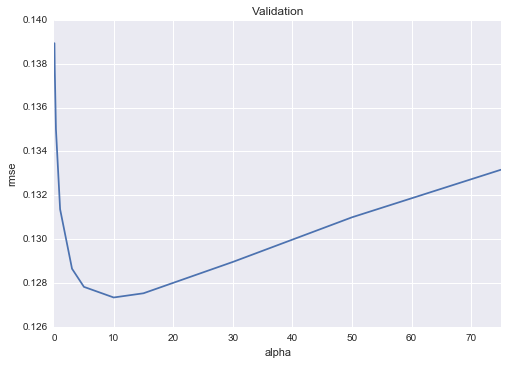

In [11]:
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title='Validation')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [12]:
cv_ridge.min()

0.12733734668670754

In [13]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [14]:
rmse_cv(model_lasso).mean()

0.12314421090977432

In [15]:
coef = pd.Series(model_lasso.coef_, index=X_train.columns)

In [16]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
      +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [17]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

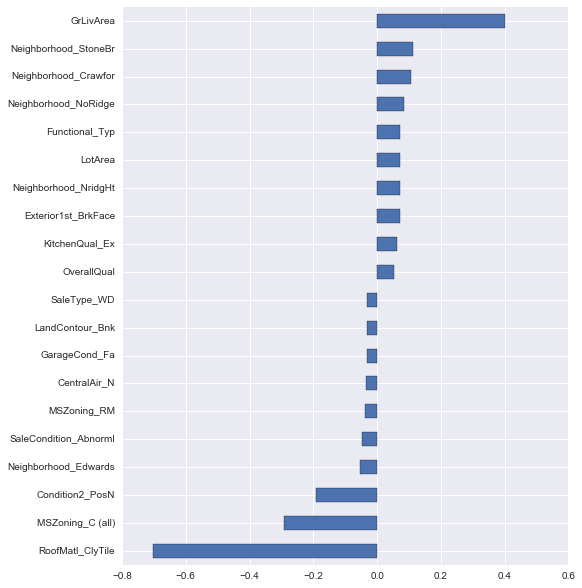

In [18]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind='barh')

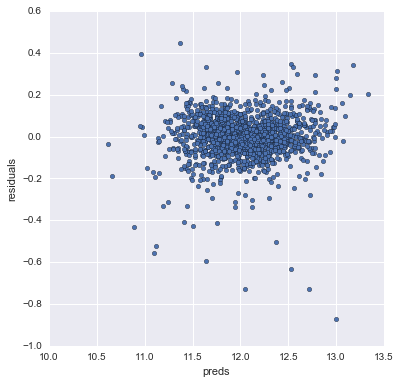

In [19]:
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)

preds = pd.DataFrame({'preds':model_lasso.predict(X_train), "true":y})
preds['residuals'] = preds['true']-preds['preds']
preds.plot(x='preds', y='residuals', kind='scatter')

In [21]:
import xgboost as xgb

In [22]:
dtrain = xgb.DMatrix(X_train, label=y)
dtest = xgb.DMatrix(X_test)

params = {'max_depth':2, 'eta':0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

In [30]:
model.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,10.380138,0.007834,10.380139,0.003413
1,9.344810,0.008219,9.344813,0.003153
2,8.413089,0.008584,8.413092,0.002927
3,7.574992,0.008599,7.574618,0.002707
4,6.820292,0.008262,6.819935,0.002493


In [33]:
model.columns

Index([u'test-rmse-mean', u'test-rmse-std', u'train-rmse-mean',
       u'train-rmse-std'],
      dtype='object')

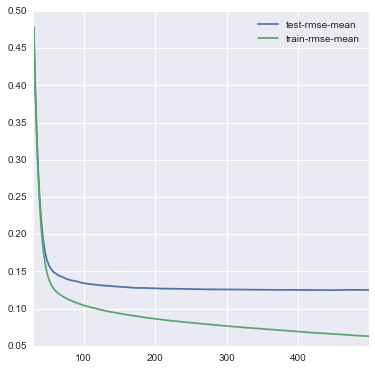

In [38]:
model.loc[30:,model.columns[[0,2]]].plot()

In [20]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


ImportError: No module named tensorflow

In [25]:
X_train = StandardScaler().fit_transform(X_train)

In [26]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state=3)

In [27]:
X_tr.shape

(1095L, 288L)

In [28]:
X_tr

array([[ 1.00573733,  0.68066137, -0.46001991, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184,  0.60296111,  0.03113183, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184, -0.02865265, -0.74027492, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ..., 
       [ 0.16426234, -0.87075036, -0.81954431, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.92361154, -0.30038284, -0.44275864, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.83656519,  1.98505948,  0.46455838, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [31]:
model = Sequential()
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss='mse', optimizer = 'adam')

In [32]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 1)             289         dense_input_2[0][0]              
Total params: 289
____________________________________________________________________________________________________


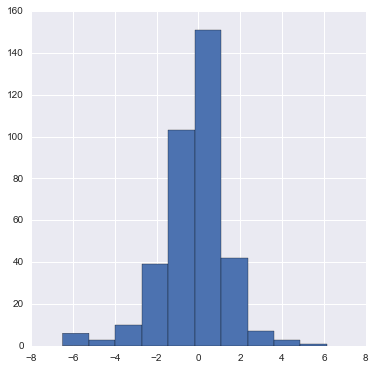

In [34]:
pd.Series(model.predict(X_val)[:, 0]).hist()